<ipython-input-1-10e58ffe0e5f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mentions, x='Mention', y='Frequency', palette='viridis')


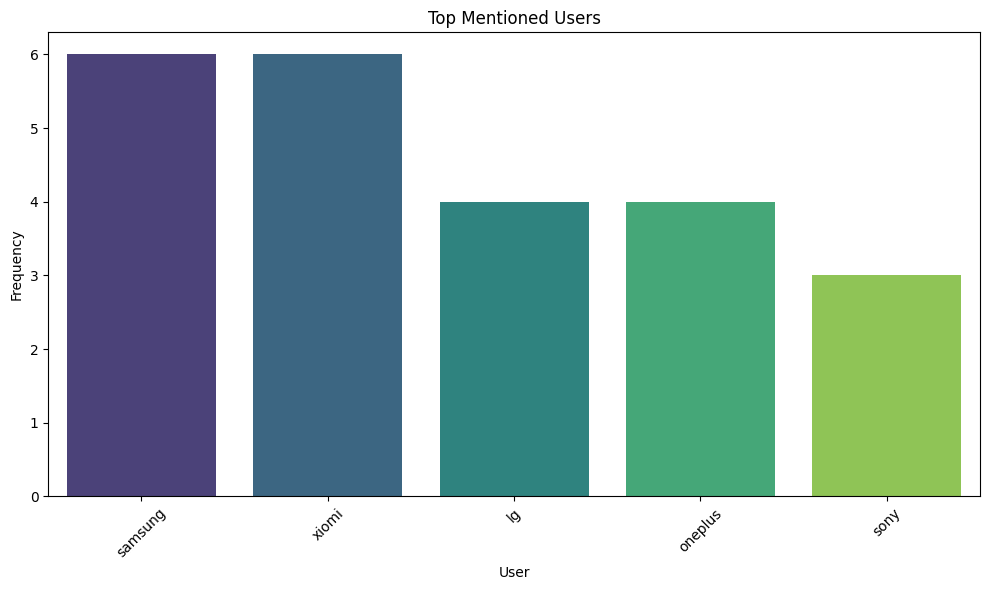

   Mention  Frequency
0  samsung          6
1    xiomi          6
2       lg          4
3  oneplus          4
4     sony          3


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with text containing mentions'
data = pd.read_csv("/content/flipkart_review_data_2022_02.csv")

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Define a function to extract mentions from text
def extract_mentions(text):
    mentions = re.findall(r'@(\w+)', text)
    return mentions

# Apply the function to the 'reviewDescription' column to extract mentions
df['Mentions'] = df['reviewDescription'].apply(extract_mentions)

# Flatten the 'Mentions' column to create a list of all mentions
all_mentions = [mention for sublist in df['Mentions'].tolist() for mention in sublist]

# Create a DataFrame to count the frequency of each mention
mentions_df = pd.DataFrame(all_mentions, columns=['Mention'])
mention_counts = mentions_df['Mention'].value_counts().reset_index()
mention_counts.columns = ['Mention', 'Frequency']

# Plotting the top mentioned users
top_mentions = mention_counts.head(5)  # Get top 5 mentioned users for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_mentions, x='Mention', y='Frequency', palette='viridis')
plt.title('Top Mentioned Users')
plt.xlabel('User')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the frequency of each mention
print(mention_counts)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-2-faab55fd20b9>:39: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


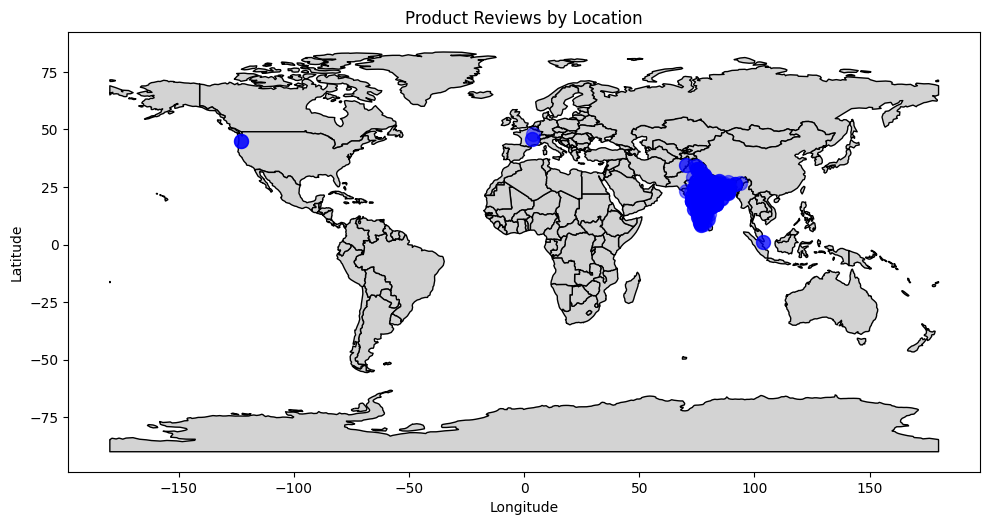

        reviewerLocation             Location   Latitude  Longitude
0                 Tenali               Tenali  16.237773  80.646422
1                 Mumbai               Mumbai  19.081577  72.886628
2               Haridwar             Haridwar  29.938447  78.145298
3              Allahabad            Allahabad  25.438130  81.833800
4      Hamirpur District    Hamirpur District  25.750000  80.000000
..                   ...                  ...        ...        ...
338    Kottayam District    Kottayam District   9.628738  76.645533
339   Kozhikode District   Kozhikode District  11.465594  75.891940
340                Jammu                Jammu  32.718561  74.858092
341             Jabalpur             Jabalpur  23.160894  79.949770
342    Balangir District    Balangir District  20.609518  83.167303

[333 rows x 4 columns]


In [2]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with text containing mentions'
data = pd.read_csv("/content/flipkart_review_data_2022_02.csv")

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to clean and extract location information and then geocode it
def clean_and_geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Clean and extract location information from the dataset and then geocode it
df['Location'] = df['reviewerLocation']
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(clean_and_geocode_location))
# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the DataFrame with point geometries
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plotting reviews on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='blue', markersize=100, alpha=0.5)
plt.title('Product Reviews by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# Display the DataFrame with geocoded locations
print(df[['reviewerLocation', 'Location', 'Latitude', 'Longitude']])


<ipython-input-3-6141a17ed4b9>:45: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-3-6141a17ed4b9>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis', ax=ax[1])


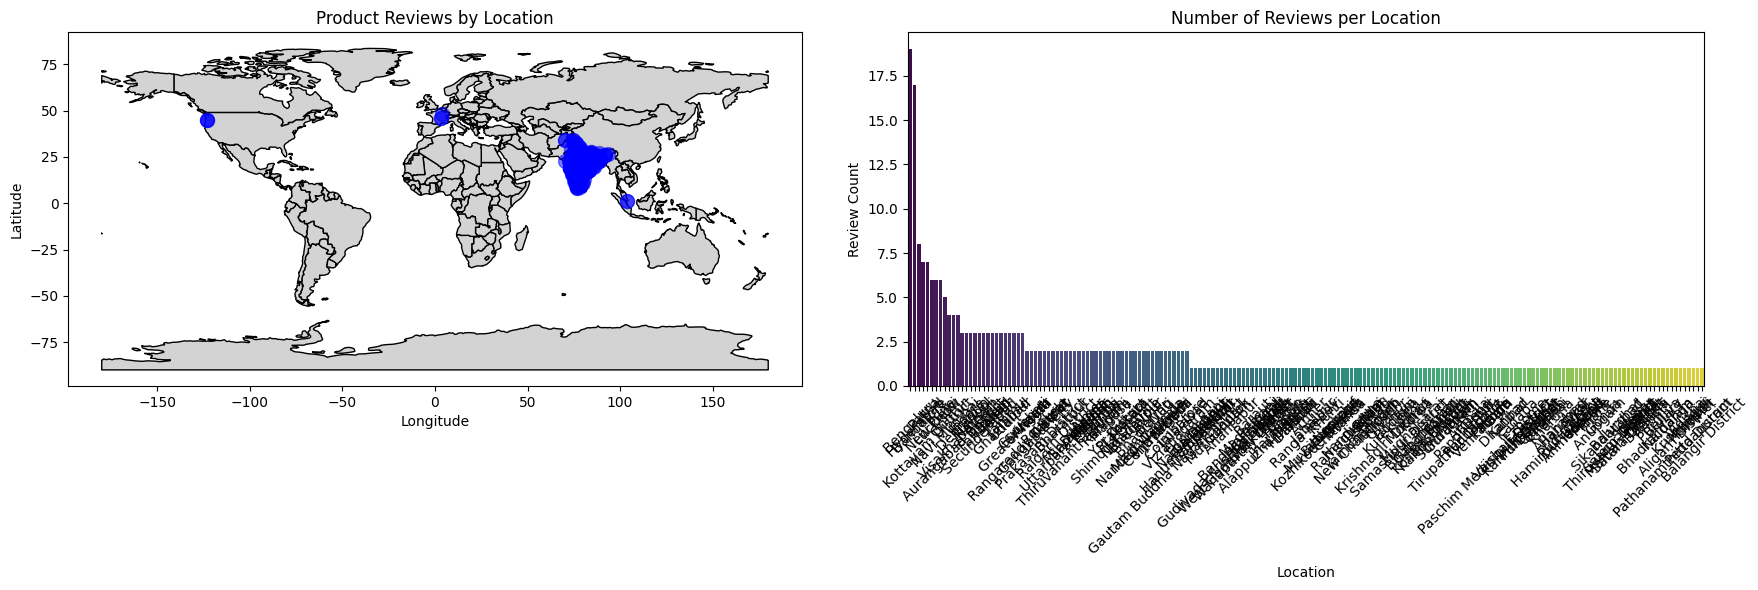

               Location  Review Count
0             Bengaluru            19
1             Hyderabad            17
2             Bangalore             8
3                 Patna             7
4     Kottayam District             7
..                  ...           ...
179             Vidisha             1
180              Mumbai             1
181             Khopoli             1
182          Peddapuram             1
183   Balangir District             1

[184 rows x 2 columns]


In [3]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Sample data with text containing mentions'
data = pd.read_csv("/content/flipkart_review_data_2022_02.csv")

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

def clean_and_geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Clean and extract location information from the dataset and then geocode it
df['Location'] = df['reviewerLocation']
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(clean_and_geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the DataFrame with point geometries
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Count the number of reviews per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Review Count']

# Plotting reviews on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting reviews on a map
world.plot(ax=ax[0], color='lightgrey', edgecolor='black')
gdf.plot(ax=ax[0], marker='o', color='blue', markersize=100, alpha=0.5, legend=True)
ax[0].set_title('Product Reviews by Location')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Plotting reviews on a bar chart
sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis', ax=ax[1])
ax[1].set_title('Number of Reviews per Location')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Review Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display the DataFrame with geocoded locations and review counts for each location
print(location_counts)


<ipython-input-9-432e9851f98f>:45: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-9-432e9851f98f>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis', ax=ax[1])


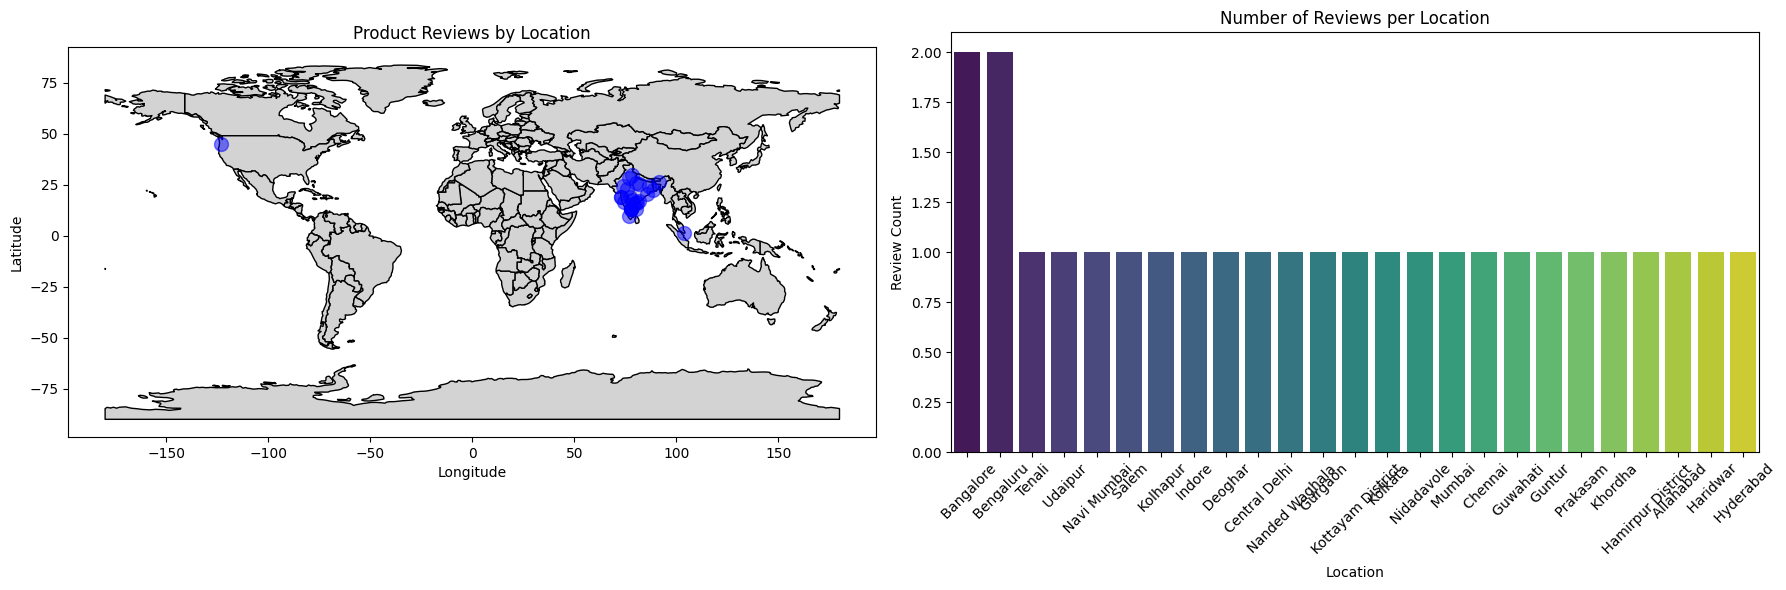

              Location  Review Count
0            Bangalore             2
1            Bengaluru             2
2               Tenali             1
3              Udaipur             1
4          Navi Mumbai             1
5                Salem             1
6             Kolhapur             1
7               Indore             1
8              Deoghar             1
9        Central Delhi             1
10      Nanded Waghala             1
11             Gurgaon             1
12   Kottayam District             1
13             Kolkata             1
14          Nidadavole             1
15              Mumbai             1
16             Chennai             1
17            Guwahati             1
18              Guntur             1
19            Prakasam             1
20             Khordha             1
21   Hamirpur District             1
22           Allahabad             1
23            Haridwar             1
24           Hyderabad             1


In [ ]:

import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Sample data with text containing mentions'
data = pd.read_csv("/content/flipkart_review_data_2022_02.csv" , nrows=30)

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

def clean_and_geocode_location(location_name):
    try:
        location = geolocator.geocode(location_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")
        return None, None

# Clean and extract location information from the dataset and then geocode it
df['Location'] = df['reviewerLocation']
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(clean_and_geocode_location))

# Filter out rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the DataFrame with point geometries
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Count the number of reviews per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Review Count']

# Plotting reviews on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting reviews on a map
world.plot(ax=ax[0], color='lightgrey', edgecolor='black')
gdf.plot(ax=ax[0], marker='o', color='blue', markersize=100, alpha=0.5, legend=True)
ax[0].set_title('Product Reviews by Location')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Plotting reviews on a bar chart
sns.barplot(data=location_counts, x='Location', y='Review Count', palette='viridis', ax=ax[1])
ax[1].set_title('Number of Reviews per Location')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Review Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display the DataFrame with geocoded locations and review counts for each location
print(location_counts)
